Importing Libraries

In [1]:
import os  # For operating system interactions like file/directory handling
import cv2  # OpenCV library for image processing
import random  # For generating random numbers or shuffling data
import numpy as np  # For numerical operations on arrays and matrices
import pandas as pd  # For data manipulation and analysis
from tqdm import tqdm  # For displaying progress bars during iterations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns # For enhanced data visualization with additional styling and plot types
from collections import Counter  # Import Counter from the collections module to count occurrences of elements



Load Dataset from google drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Animals"
sub_folder = os.listdir(data_path)
print(sub_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Jaguar', 'Tiger', 'Cheetah', 'Lion', 'Leopard']


Evaluating Index of subfolder

In [19]:

tiger_folder = os.path.join(data_path, sub_folder[0])  # Construct the path to the first subdirectory (e.g., 'Tiger') within the 'Animals' dataset
print(tiger_folder)  # Display the path to the 'Tiger' folder or the first animal category in the dataset


/content/drive/MyDrive/Animals/Jaguar


In [20]:
lion_folder=os.path.join(data_path,sub_folder[1])
print(lion_folder)

/content/drive/MyDrive/Animals/Tiger


In [21]:
jaguar_folder=os.path.join(data_path,sub_folder[2])
print(jaguar_folder)

/content/drive/MyDrive/Animals/Cheetah


In [22]:
cheetah_folder=os.path.join(data_path,sub_folder[3])
print(cheetah_folder)

/content/drive/MyDrive/Animals/Lion


In [24]:
leopard_folder=os.path.join(data_path,sub_folder[4])
print(leopard_folder)


/content/drive/MyDrive/Animals/Leopard


In [15]:

for c in os.listdir(data_path):
    # Print the name of the current category
    print("Category:-> ", c)
    # Construct the full path to the current category
    path = os.path.join(data_path, c)
    print("Path:->", path)

    # Get the index of the current category in the directory listing
    class_index = os.listdir(data_path).index(c)
    print("Class index:->", class_index)


Category:->  Jaguar
Path:-> /content/drive/MyDrive/Animals/Jaguar
Class index:-> 0
Category:->  Tiger
Path:-> /content/drive/MyDrive/Animals/Tiger
Class index:-> 1
Category:->  Cheetah
Path:-> /content/drive/MyDrive/Animals/Cheetah
Class index:-> 2
Category:->  Lion
Path:-> /content/drive/MyDrive/Animals/Lion
Class index:-> 3
Category:->  Leopard
Path:-> /content/drive/MyDrive/Animals/Leopard
Class index:-> 4


Cheetah Image Path: /content/drive/MyDrive/Animals/Cheetah/pexels-photo.jpg
Image shape: (333, 500, 3)


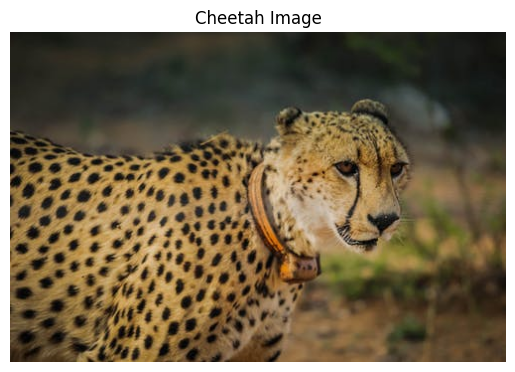

Pixel Array of the Image:
[[[17 20 24]
  [17 20 24]
  [18 21 25]
  ...
  [20 22 22]
  [20 22 22]
  [20 22 22]]

 [[17 20 24]
  [18 21 25]
  [18 21 25]
  ...
  [20 22 22]
  [20 22 22]
  [20 22 22]]

 [[18 21 25]
  [18 21 25]
  [18 21 25]
  ...
  [20 22 22]
  [20 22 22]
  [20 22 22]]

 ...

 [[16 32 45]
  [12 28 41]
  [13 29 42]
  ...
  [33 52 73]
  [33 52 73]
  [33 52 73]]

 [[15 31 44]
  [12 28 41]
  [14 30 43]
  ...
  [33 52 73]
  [33 52 73]
  [33 52 73]]

 [[12 28 44]
  [11 27 43]
  [13 29 45]
  ...
  [35 52 73]
  [35 52 73]
  [35 52 73]]]


In [30]:
# Construct full path to the 'Cheetah' folder
cheetah_folder = os.path.join(data_path, "Cheetah")

# List all image files in the Cheetah folder
cheetah_imgs = os.listdir(cheetah_folder)

# Construct full path to the first image
cheetah_img_1 = os.path.join(cheetah_folder, cheetah_imgs[20])
print("Cheetah Image Path:", cheetah_img_1)

# Read the image using OpenCV
read_cheetah_img = cv2.imread(cheetah_img_1)

# Check if image is loaded
if read_cheetah_img is not None:
    print("Image shape:", read_cheetah_img.shape)

    # Convert to RGB for display with matplotlib
    cheetah_rgb = cv2.cvtColor(read_cheetah_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(cheetah_rgb)
    plt.title("Cheetah Image")
    plt.axis('off')
    plt.show()

    # Display the pixel array of the image
    print("Pixel Array of the Image:")
    print(read_cheetah_img)  # Displaying the pixel array of the image
else:
    print("Failed to load the image.")


Grayscale of that original image

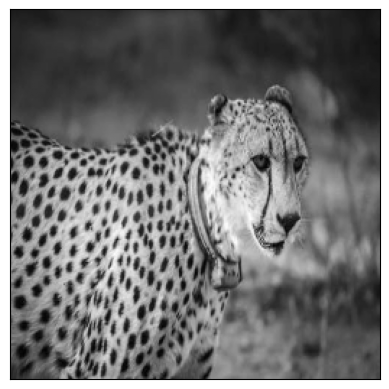

In [31]:
img_gray_tiger = cv2.imread(cheetah_img_1, cv2.IMREAD_GRAYSCALE)

# Create a new figure
plt.figure()

# Resize the grayscale image to 256x256 pixels
img_resized = cv2.resize(img_gray_tiger, (256, 256))

# Display the resized grayscale image with a grayscale color map
plt.imshow(img_resized, cmap='gray')

# Remove x and y axis ticks for a cleaner view
plt.xticks([])
plt.yticks([])

# Show the image
plt.show()

Training Data

In [33]:
from tqdm import tqdm  # Import tqdm for the progress bar
import os
import cv2

train = []
labels = []

for animal in os.listdir(data_path):  # Iterate through the directories inside the path
    labels.append(animal)  # Add the directory name as animal name to the labels list
    animal_path = os.path.join(data_path, animal)  # Get the path of the animal's directory

    # Iterate through the images inside the animal directory with a progress bar
    for img_filename in tqdm(os.listdir(animal_path)):
        img_path = os.path.join(animal_path, img_filename)  # Get the path of the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (256, 256))  # Resize the image to 256x256
        train.append([img, labels.index(animal)])  # Create a list of image and its label

print("\n")
print("Total images:", len(train))
print("")


100%|██████████| 31/31 [00:00<00:00, 99.64it/s]



Total images: 170



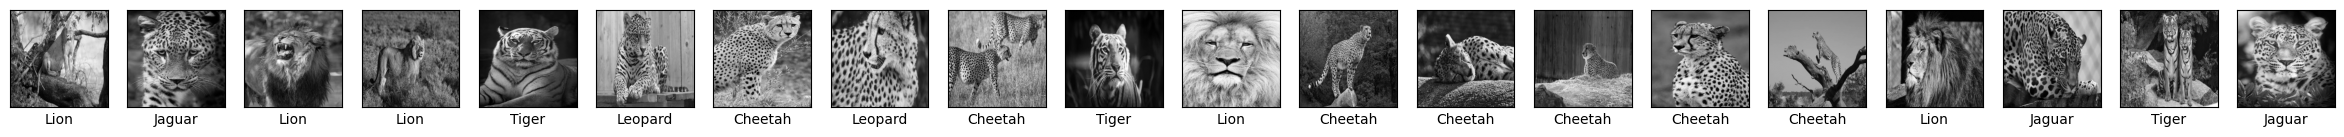

In [42]:
random.shuffle(train)
plt.figure(figsize=(30, 10))  # Set a wide figure size to display 20 images side-by-side

# Loop through the first 20 images in the 'train' dataset
for i in range(20):
    plt.subplot(1, 20, i + 1)  # Create a 1x20 grid of subplots and select the ith subplot
    plt.imshow(train[i][0], cmap='gray')  # Display the image in grayscale

    # Set the label for each image using the 'labels' list and the class index in 'train'
    plt.xlabel(labels[train[i][1]])

    # Remove x and y axis ticks for a cleaner display
    plt.xticks([])
    plt.yticks([])

plt.show()  # Display all 20 images in the figure


In [43]:
fold_size = len(train) // 5  # Calculate the size of each fold by dividing the dataset into 5 equal parts
print(fold_size)  # Display the number of samples in each fold


34


In [44]:
# Create 10 folds using list comprehension
# Each fold is a slice of the training data
folds = [train[i * fold_size:(i + 1) * fold_size] for i in range(10)]

# Iterate over each fold to print its size
for i, fold in enumerate(folds):
    print(f"Fold {i+1} has {len(fold)} images")

Fold 1 has 34 images
Fold 2 has 34 images
Fold 3 has 34 images
Fold 4 has 34 images
Fold 5 has 34 images
Fold 6 has 0 images
Fold 7 has 0 images
Fold 8 has 0 images
Fold 9 has 0 images
Fold 10 has 0 images


In [46]:
import numpy as np
from collections import Counter

# Define the Euclidean distance function
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(train_data, k_values):
    # Ensure `train_data` is a NumPy array
    train_data = np.array(train_data, dtype=object)  # Use dtype=object for mixed data types (features and label)

    all_accuracies = {}  # Dictionary to store fold accuracies for each k

    for k in k_values:
        folds = np.array_split(train_data, 10)  # Split data into 10 folds
        fold_accuracies = []

        # Cross-validation
        for i in range(10):
            # Use the i-th fold as the validation set
            validation_set = folds[i]

            # Use the remaining folds as the training set
            training_set = np.concatenate([folds[j] for j in range(10) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                    # Calculate Euclidean distance
                    d = euclidean_distance(t[0], v[0])
                    distances.append([d, t[1]])  # Store distance and label

                distances.sort()  # Sort based on distance

                # Get labels of k nearest neighbors
                k_nearest_labels = [distances[j][1] for j in range(k)]

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            # Calculate accuracy for this fold
            accuracy = correct_predictions / len(validation_set)
            fold_accuracies.append(accuracy)

        # Print accuracies for each fold for the current k
        print(f"K = {k}:")
        for fold_idx, fold_accuracy in enumerate(fold_accuracies, 1):
            print(f"  Fold {fold_idx}: Accuracy = {fold_accuracy:.2f}")

        # Calculate and print the average accuracy across the 5 folds
        mean_accuracy = np.mean(fold_accuracies)
        print(f"  ----------------------------")
        print(f"  Average Accuracy = {mean_accuracy:.2f}")
        print(f"  ----------------------------\n")

        # Store the fold accuracies in the dictionary for this k
        all_accuracies[k] = fold_accuracies

    return all_accuracies

# Assuming `train` is a dataset where each element is [features, label]
k_values = range(1, 31)  # Example range of k values for demonstration
euclidean_accuracies = knn(train, k_values)


K = 1:
  Fold 1: Accuracy = 0.24
  Fold 2: Accuracy = 0.24
  Fold 3: Accuracy = 0.47
  Fold 4: Accuracy = 0.29
  Fold 5: Accuracy = 0.18
  Fold 6: Accuracy = 0.35
  Fold 7: Accuracy = 0.41
  Fold 8: Accuracy = 0.35
  Fold 9: Accuracy = 0.12
  Fold 10: Accuracy = 0.24
  ----------------------------
  Average Accuracy = 0.29
  ----------------------------

K = 2:
  Fold 1: Accuracy = 0.24
  Fold 2: Accuracy = 0.24
  Fold 3: Accuracy = 0.47
  Fold 4: Accuracy = 0.29
  Fold 5: Accuracy = 0.18
  Fold 6: Accuracy = 0.35
  Fold 7: Accuracy = 0.41
  Fold 8: Accuracy = 0.35
  Fold 9: Accuracy = 0.12
  Fold 10: Accuracy = 0.24
  ----------------------------
  Average Accuracy = 0.29
  ----------------------------

K = 3:
  Fold 1: Accuracy = 0.24
  Fold 2: Accuracy = 0.24
  Fold 3: Accuracy = 0.41
  Fold 4: Accuracy = 0.24
  Fold 5: Accuracy = 0.24
  Fold 6: Accuracy = 0.29
  Fold 7: Accuracy = 0.41
  Fold 8: Accuracy = 0.29
  Fold 9: Accuracy = 0.12
  Fold 10: Accuracy = 0.24
  ----------------

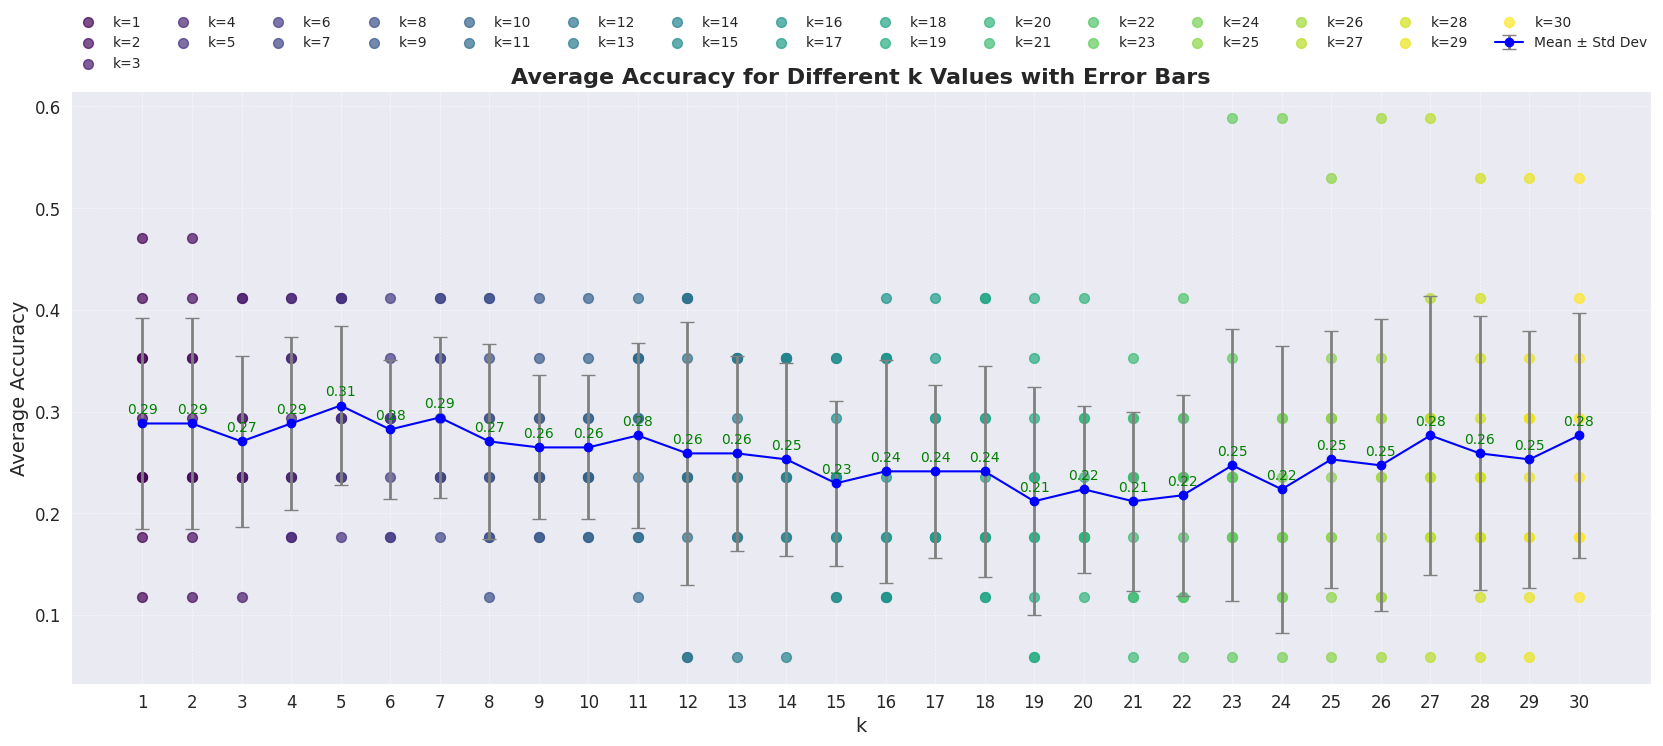

In [59]:
def plot_accuracies(euclidean_accuracies, k_values):
    plt.figure(figsize=(18, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(k_values)))  # Color map for k values

    euclidean_mean_accuracies = []
    euclidean_std_accuracies = []

    # Loop over accuracies for each k
    for (k, fold_accuracies), color in zip(euclidean_accuracies.items(), colors):
        # Plot individual fold accuracies with varied colors
        plt.scatter([k] * len(fold_accuracies), fold_accuracies, color=color, alpha=0.7, s=50, label=f'k={k}')

        # Calculate mean and standard deviation for each k
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        # Append to lists for error bar plotting
        euclidean_mean_accuracies.append(mean_acc)
        euclidean_std_accuracies.append(std_acc)

    # Plot mean accuracies with error bars
    plt.errorbar(k_values, euclidean_mean_accuracies, yerr=euclidean_std_accuracies, fmt='o-', color='blue',
                 ecolor='gray', elinewidth=2, capsize=5, label='Mean ± Std Dev')

    # Add text labels for each mean accuracy point
    for k, mean_acc in zip(k_values, euclidean_mean_accuracies):
        plt.text(k, mean_acc + 0.01, f'{mean_acc:.2f}', ha='center', fontsize=10, color='green')

    # Seaborn styling for improved aesthetics
    sns.set_style('darkgrid')
    plt.title('Average Accuracy for Different k Values with Error Bars', fontsize=16, fontweight='bold')
    plt.xlabel('k', fontsize=14)
    plt.ylabel('Average Accuracy', fontsize=14)
    plt.xticks(k_values, fontsize=12)
    plt.yticks(fontsize=12)

    # Move legend to top
    plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(k_values) // 2, frameon=False)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Ensure layout is adjusted
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
k_values = range(1, 31)
plot_accuracies(euclidean_accuracies, k_values)
